# Introduction to Statistics

## What exactly is statistics?

Statistics is in essence the science of working with data and answering data related questions. Its a pretty important prereq for having a general and even deeper understanding of Machine Learning. The field is very broad, with many many different types of methods and fields, but there are two general categories for statistics - **Descriptive** and **Inferential Statistics**

### Descriptive Statistics 

Descriptive statistics is exactly like what it sounds. Describing and summarizing data. Examples of this includes familiar values like **mean**, **mode**, **variance**, and **standard deviation**

### Inferential Statistics

Inferential statistics is a step above Descriptive Stats. With this we are creating meaning out of data by looking at the relationships between values in our data set. Examples of this include **ANOVA tests**, **hypothesis testing**, **regression analysis**, and **confidence level interval estimation**. 

## Gaussian Distribution and Descriptive Statistics

Very often when you take a sample data set that is representative of a braoder population, you'll notice most observations fit a common "pattern" or distribution which statisticians like to call the Gaussian Distribution also more well known as the Normal Distribution. This distrubution usually has a bell shape curve.  

Alot is known about this distrubution and there are many subfields to study it, but any Gaussian distribution and in turn any data drawn from this type of distribution can be summarized with just three parameters:

- `Mean`: This is the central tendency and is the average of your data set(the most likely value in the distribution)

- `Variance`: This tells us how far our values are from the mean and shows us how spread out our observations are. Low variance means alot of variables are clustered around the mean. High variance means they are very far away. Variance is usually measure by taking the distance of each data point from the mean, squaring each one, then adding all of them up. As a result its not scaled to our data set. Standard deviation might give us a better picture of our observations 
    
- `Standard Deviation`: This measure will be on the same scale as our data set and will give us an overall picture of how far a data point is from the mean

### Example

**Lets calculate some summary statistics for a random data set we will generate**:

In [72]:
import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import var
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
seed(1)
data = 5 *randn(10000) + 50

In [14]:
print('Mean: %.3f' %mean(data))
print('Variance: %.3f' %mean(data))
print('Standard Deviation: %.3f' %std(data))

Mean: 50.049
Variance: 50.049
Standard Deviation: 4.994


**Interpretation of Metrics**
- Our data set has a mean of 50, meaning on average, thats the numerical value most of our values will have
- We have a variance of about 50, giving us an indication that there is a decent amount of our observations that are quite spread out and our data set is highly variable
- Our standard deviation is 5, telling us most of our observations are about 5 points away from the mean

In [32]:
# Put our data in a data frame 
df = pd.DataFrame(data)
# Give a column name for our one column 
df.columns = ['data']

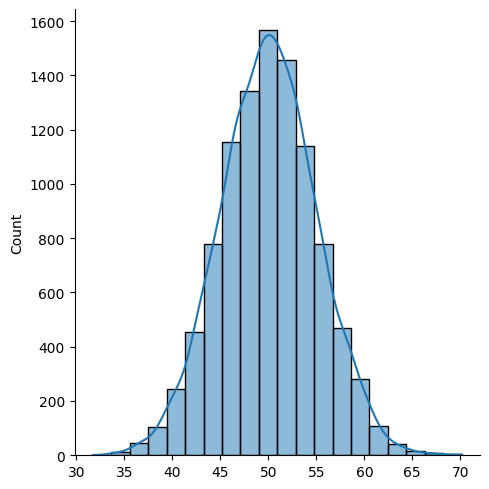

In [31]:
# Lets create a histogram to look at the distrubution of our data set 
df_plot = sns.displot(df, x=data, bins = 20, kde=True)

In [19]:
df.describe()

,data
count,10000.000000
mean,50.048863
std,4.994179
min,31.717800
25%,46.685376
50%,50.042270
75%,53.359044
max,70.134245


**Interpretation of Describe Metrics**
- Min tells us the minimum value is 31.71
- Max tells us the maximum is 70.13
- 25% percentile tells us that 75% of our data is above 46.68, while 25% is below that value 
- 50% percentile tells us that half of our data obs are above 50.0422 while half are also below that 
- 75% percentile tells us that 25% of our data is above 70.13, while 75% is below that 

**Lets visualize this to make it clearer**

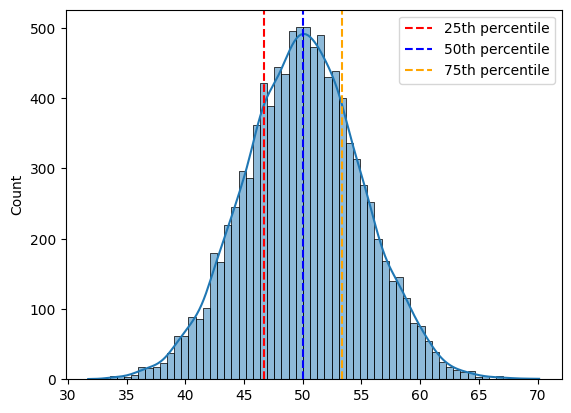

In [89]:
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)

sns.histplot(data=data, kde=True)

plt.axvline(x=p25, color='red', linestyle='--', label='25th percentile')
plt.axvline(x=p50, color='blue', linestyle='--', label='50th percentile')
plt.axvline(x=p75, color='orange', linestyle='--', label='75th percentile')
plt.legend()

## Inferential Statistics: Correlation Between Variables 

Lets download a ML dataset to explore some inferential statistics

**Link**: [Dataset](https://machinelearningmastery.com/standard-machine-learning-datasets/)

**Other_RegressionAnalysis_for_this_data**: [TowardsDS](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

**Meaning of Values:**
- CRIM:  per capita crime rate by town.
- ZN:    proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of nonretail business acres per town.
- CHAS:  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX:   nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per 10,000 dollars.
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT: % lower status of the population.
- MEDV: Median value of owner-occupied homes in $1000s.

**Prelim_Analysis**: Our target variable will be MEDV and everything else will be feature variables

In [39]:
import csv

In [60]:
#Make our column names so we can define them in our dataset
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
           'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [63]:
#Read in our data and put in some extra things to make sure its all formatted correctly
bh = pd.read_csv('housing.data', header=None, names=columns, delim_whitespace=True)

In [64]:
#lets check to see if our dataset looks pretty. I hope it looks pretty
bh

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [65]:
bh.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
